<a href="https://colab.research.google.com/github/bkksl/AI_Bootcamp_Group_Projects-/blob/ahmetbersoz/globalaihub_ai_bootcamp_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [93]:
# BOLUM 2: Gerekli Kütüphanelerin Eklenmesi

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

url = 'https://raw.githubusercontent.com/bkksl/AI_Bootcamp_Group_Projects-/ahmetbersoz/insurance.csv'
df = pd.read_csv(url)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
274 kisi sigara iciyor,1064 kisi sigara icmiyor.
sigara icenlerin ortalama odedigi ucret: 32050.23183153284
sigara icmeyenlerin ortalama odedigi ucret: 8434.268297856204


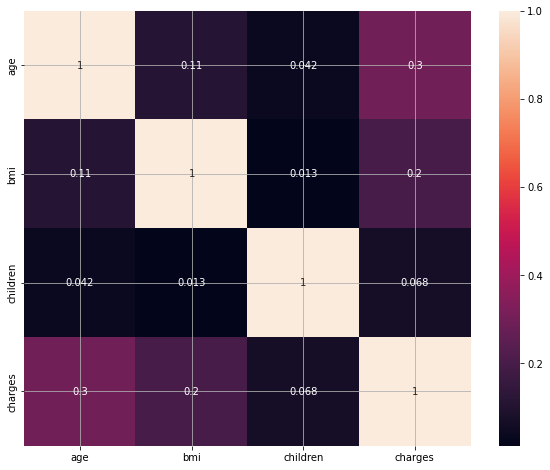

In [94]:
# BOLUM 3: Keşifsel Veri Analizi Yapılması

df.info()

corr = df.corr()
fig, ax = plt.subplots(figsize = (10,8))
ax = sns.heatmap(corr, annot=True)

## Bmi(Vücut Kitle İndeksi)’nin dağılımını inceleyiniz
df["bmi"].hist(bins=10)

## “smoker” ile “charges” arasındaki ilişkiyi inceleyiniz
smokers = df[df["smoker"] == "yes"]
nonSmokers = df[df["smoker"] == "no"]

print(str(smokers.shape[0]) + " kisi sigara iciyor," + str(nonSmokers.shape[0]) + ' kisi sigara icmiyor.')
print('sigara icenlerin ortalama odedigi ucret: ' + str(smokers["charges"].mean()))
print('sigara icmeyenlerin ortalama odedigi ucret: ' + str(nonSmokers["charges"].mean()))

#TODO: diger kesifsel analizler

In [95]:
# BOLUM 4: Veri Ön İşleme Yapılması

#string inputtan integer'a gecis
df['sex'] = pd.Categorical(df['sex']).codes
df['smoker'] = pd.Categorical(df['smoker']).codes
df['region'] = pd.Categorical(df['region']).codes

#normalizasyon
df = (df / df.max(axis=0))

#sutunlarin ayarlanmasi
X = df.drop('charges', axis=1)
y = df['charges']

#splitlerin belirlenmesi
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=6)

In [96]:
# BOLUM 5: Model Seçme

#TODO: Baska modellerin denenmesi

model = LinearRegression()

model.fit(X_train, y_train)  

LinearRegression()

In [97]:
# BOLUM 6: Hiper-parametre Optimizasyonu

#TODO: Grid search

In [98]:
# BOLUM 7: Modeli Değerlendirme

y_pred = model.predict(X_test)

print('Variance score: {}'.format(model.score(X_test, y_test)))

print('Mean Squared Error: {}'.format(mean_squared_error(y_pred, y_test)))

print('Mean Absolute Error: {}'.format(mean_absolute_error(y_pred, y_test)))

Variance score: 0.7785295914318422
Mean Squared Error: 0.007902711104043496
Mean Absolute Error: 0.06381329864767041
